In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from wordcloud import WordCloud
import sys
sys.path.append('../')
from helpers import *

data_path = './../../../data'

In [2]:
rb_dir = os.path.join(data_path, 'RateBeer')
exp_categories = get_exp_categories(data_path) + ['expertness_score']
rev_with_scores_rb = pd.read_pickle(os.path.join(rb_dir, 'rev_w_scores.pkl'))
exp_dict = get_exp_dict_stems(data_path)


In [3]:
def compute_word_occ(df, word_occ):
    for x in df:
        if len(x)<1:
            continue
        for word in x:
            if word in word_occ.keys():
                word_occ[word]+= 1
            else: 
                word_occ[word]= 1
    return word_occ

In [4]:
word_occ = {}
word_occ = compute_word_occ(rev_with_scores_rb.stems, word_occ)

In [5]:
ba_dir = os.path.join(data_path, 'BeerAdvocate')
exp_categories = get_exp_categories(data_path) + ['expertness_score']
rev_with_scores_ba = pd.read_pickle(os.path.join(ba_dir, 'rev_w_scores.pkl'))

In [6]:
word_occ = compute_word_occ(rev_with_scores_ba.stems, word_occ)

In [7]:
for key in exp_dict:
    if exp_dict[key] in word_occ.keys():
        exp_dict[key]= word_occ[exp_dict[key]]
    else:
        exp_dict[key]= 0

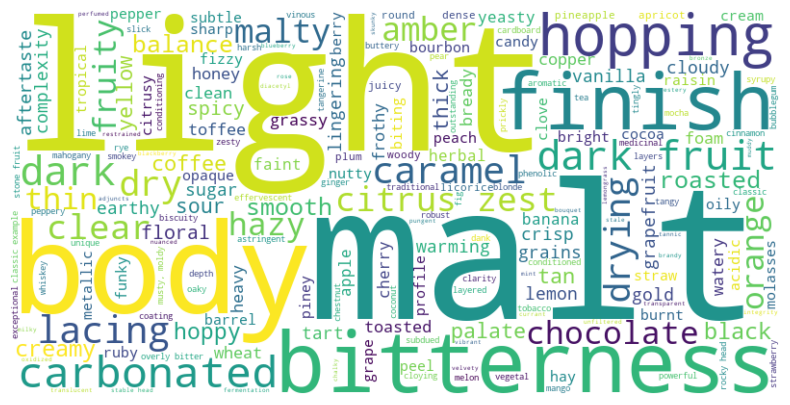

In [8]:
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='viridis'
).generate_from_frequencies(exp_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()
